<a href="https://colab.research.google.com/github/ShriomiGite/NLP/blob/main/Ecommerce_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, SimpleRNN, Bidirectional, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [127]:
df=pd.read_csv("ecommerce.csv")
print(df.head())

print(df.shape)

       label                                               text
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...
(50437, 2)


In [128]:
df.isnull().sum()

label    12
text     13
dtype: int64

In [129]:
df=df.dropna()

In [176]:
#df[df['label']=="Household"]


In [131]:
df.drop(df.index[10000:19313],inplace=True)

In [177]:
#df[df['label']=="Books"]

In [133]:
df.drop(df.index[19313:24314],inplace=True)

In [179]:
#df[df['label']=="Electronics"]

In [135]:
df.drop(df.index[39816:45322],inplace=True)

In [180]:
#df[df['label']=="Clothing & Accessories"]

In [137]:
df.drop(df.index[33639:36640],inplace=True)

In [140]:
df['label'].value_counts()

Household                 10000
Books                      9313
Electronics                8150
Clothing & Accessories     6176
Name: label, dtype: int64

In [141]:
Household=" ".join(df[df['label']=='Household']['text'])
Books=" ".join(df[df['label']=='Books']['text'])
Electronics =" ".join(df[df['label']=='Electronics']['text'])
Clothing_Accessories=" ".join(df[df['label']=='Clothing & Accessories']['text'])

In [143]:
def Wordcloud(label):
  wc=WordCloud(height=600,width=600,background_color="white",min_font_size=9)
  wc.generate(label)

  plt.figure(figsize=(7,5))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

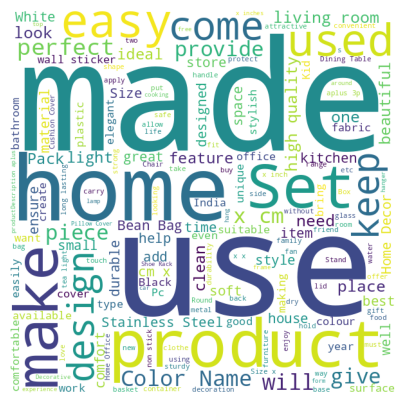

In [144]:
Wordcloud(Household)

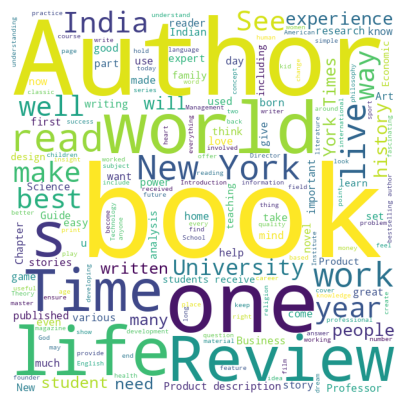

In [145]:
Wordcloud(Books)

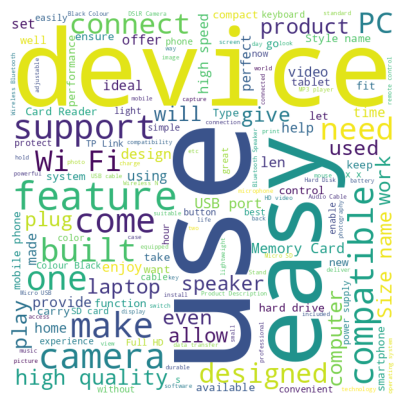

In [146]:
Wordcloud(Electronics)

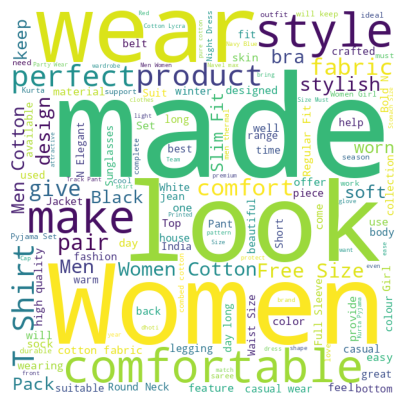

In [147]:
Wordcloud(Clothing_Accessories)

In [148]:
x=df['text']
y=df['label']



In [150]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)
ytrain=keras.utils.to_categorical(y_train)
ytest=keras.utils.to_categorical(y_test)

##Keras Tokenizer

In [152]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train)

In [153]:
vocabulary=tokenizer.index_word
#here,tokens are split
vocabulary_length=len(vocabulary)
print(vocabulary_length)
print(vocabulary)

62794
{1: 'the', 2: 'and', 3: 'of', 4: 'to', 5: 'a', 6: 'for', 7: 'in', 8: 'with', 9: 'is', 10: 'your', 11: 'you', 12: 'it', 13: 'this', 14: 'on', 15: 'that', 16: 'from', 17: 'or', 18: 'as', 19: 'can', 20: 'are', 21: '1', 22: 'be', 23: 'an', 24: 'all', 25: 'has', 26: '2', 27: 'at', 28: 'by', 29: 'size', 30: 'book', 31: '3', 32: 'he', 33: 'will', 34: 'about', 35: 'x', 36: 'author', 37: 'one', 38: 'not', 39: 'his', 40: 'have', 41: 'up', 42: '5', 43: 'quality', 44: 'set', 45: 'which', 46: 'home', 47: 'black', 48: 'also', 49: '4', 50: 'high', 51: 'product', 52: 'our', 53: 'use', 54: 'made', 55: 'more', 56: 'color', 57: 'design', 58: 'new', 59: 'cotton', 60: 'any', 61: 'we', 62: 'easy', 63: 'usb', 64: 'time', 65: 'light', 66: 'its', 67: 'these', 68: 'best', 69: 'other', 70: 'was', 71: 'most', 72: '6', 73: 'perfect', 74: '\xa0', 75: 'power', 76: 'table', 77: 'i', 78: '0', 79: 'so', 80: 'life', 81: 'no', 82: 'when', 83: 'make', 84: 'style', 85: 'material', 86: 'used', 87: 'into', 88: 'look', 

##Text to Sequence

In [154]:
#to keep the above tokens in the sequence
train_seq=tokenizer.texts_to_sequences(x_train)


##Padding

In [155]:
doc_length = []
for doc in train_seq:
  doc_length.append(len(doc))

print(doc_length)

[53, 109, 21, 148, 17, 141, 103, 68, 152, 12, 47, 129, 64, 19, 67, 56, 104, 47, 5, 287, 83, 364, 245, 80, 53, 119, 9, 70, 13, 40, 42, 186, 53, 160, 167, 226, 413, 44, 15, 134, 433, 166, 47, 43, 296, 73, 88, 62, 48, 49, 20, 4, 17, 144, 5, 9, 232, 126, 161, 63, 93, 192, 4, 20, 8, 56, 4, 236, 14, 109, 130, 57, 19, 29, 17, 64, 240, 105, 40, 20, 82, 127, 83, 8, 13, 134, 278, 28, 168, 75, 101, 329, 61, 17, 293, 74, 96, 111, 36, 65, 171, 157, 72, 256, 179, 124, 222, 71, 17, 166, 9, 46, 38, 39, 234, 101, 32, 54, 72, 126, 251, 92, 128, 6, 50, 233, 32, 67, 9, 255, 95, 75, 83, 95, 23, 107, 31, 251, 3, 121, 112, 51, 94, 114, 6, 53, 9, 14, 266, 75, 434, 45, 181, 52, 34, 831, 49, 107, 50, 147, 20, 131, 166, 41, 53, 65, 20, 139, 69, 98, 113, 312, 572, 170, 44, 353, 44, 40, 45, 37, 160, 267, 108, 168, 91, 249, 313, 28, 163, 59, 46, 6, 98, 16, 166, 298, 36, 382, 217, 145, 66, 232, 232, 80, 178, 113, 84, 98, 20, 28, 127, 164, 34, 11, 82, 105, 76, 179, 236, 148, 3, 203, 63, 36, 37, 56, 32, 9, 67, 43, 46,

In [156]:
max(doc_length)

5908

In [157]:
print(np.quantile(doc_length,0.9))
print(np.quantile(doc_length,0.95))
print(np.quantile(doc_length,0.99))

259.0
319.0
633.1800000000003


In [160]:
max_length=630

In [161]:
train_matrix=sequence.pad_sequences(train_seq,maxlen=max_length)
train_matrix

array([[    0,     0,     0, ...,   329, 12465,  2752],
       [    0,     0,     0, ...,    11,   303,    12],
       [    0,     0,     0, ...,   130,    76,   100],
       ...,
       [    0,     0,     0, ...,     2,  1891,    57],
       [    0,     0,     0, ...,  1282,   458, 40790],
       [    0,     0,     0, ...,  7738,  2348,   253]], dtype=int32)

##Preprocessing Text Data

In [162]:
test_seq=tokenizer.texts_to_sequences(x_test)
test_matrix=sequence.pad_sequences(test_seq,maxlen=max_length)
test_matrix

array([[    0,     0,     0, ...,   243,  1021,   336],
       [    0,     0,     0, ..., 60260,  1548,   300],
       [    0,     0,     0, ...,   316,  7265,  1631],
       ...,
       [    0,     0,     0, ...,    24,  1665,   448],
       [    0,     0,     0, ...,   932,     2,  6426],
       [    0,     0,     0, ..., 13533, 47424,  1983]], dtype=int32)

#NEURAL NETWORK

In [166]:
earlystop=EarlyStopping()

In [190]:
model=Sequential()

model.add(Embedding(input_dim=vocabulary_length+1,
                    output_dim=100,
                    input_length=max_length,
                    mask_zero=True))
model.add(Flatten())
model.add(Dense(64,activation="tanh"))
model.add(Dense(32,activation="tanh"))
model.add(Dense(16,activation="tanh"))

model.add(Dense(4,activation="softmax"))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy")



In [191]:
model.fit(train_matrix,y_train,epochs=10, batch_size=50)

Epoch 1/10
404/404 [==============================] - 55s 132ms/step - loss: 0.6122
Epoch 2/10
404/404 [==============================] - 35s 86ms/step - loss: 0.0723
Epoch 3/10
404/404 [==============================] - 24s 58ms/step - loss: 0.0200
Epoch 4/10
404/404 [==============================] - 17s 43ms/step - loss: 0.0095
Epoch 5/10
404/404 [==============================] - 13s 32ms/step - loss: 0.0056
Epoch 6/10
404/404 [==============================] - 9s 23ms/step - loss: 0.0041
Epoch 7/10
404/404 [==============================] - 10s 25ms/step - loss: 0.0036
Epoch 8/10
404/404 [==============================] - 7s 18ms/step - loss: 0.0029
Epoch 9/10
404/404 [==============================] - 6s 16ms/step - loss: 0.0029
Epoch 10/10
404/404 [==============================] - 8s 20ms/step - loss: 0.0016


In [192]:
y_pred=np.argmax(model.predict(test_matrix),axis=1)



421/421 [==============================] - 1s 2ms/step


In [193]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3825
           1       0.97      0.99      0.98      2394
           2       0.98      0.96      0.97      3186
           3       0.97      0.97      0.97      4051

    accuracy                           0.97     13456
   macro avg       0.97      0.97      0.97     13456
weighted avg       0.97      0.97      0.97     13456

